## MSDS-593: Lab 2
### Jacek Plonowski

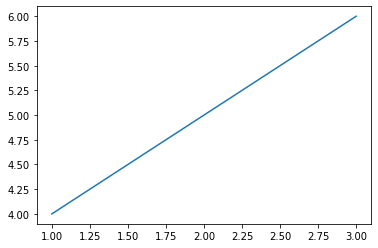

In [16]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],
             [4,5,6])
plt.show()

In [13]:
! pwd | cut -d'/' -f5- #dir of lab assignments within repo

msds593/labs


In [17]:
! ls ../notebooks/data/ #cars data from repo's notebook dir

cars.csv	happy-2016.csv		       organdonation.csv
happy-2015.csv	kaggle-uber-other-federal.csv


In [4]:
import pandas as pd
import numpy as np

path = "../notebooks/data/"
data = pd.read_csv(path+"cars.csv")
data.head(5)

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [8]:
avg_mpg = data.groupby('CYL').mean()['MPG'] #avg mpg for cars with same cyl val
avg_wgt = data.groupby('CYL').mean()['WGT'] #avg weight for cars with same cyl val
avg_mpg_wgt= data.groupby('WGT').mean()['MPG'] #avg miles per gal for cars with same weight val

In [10]:
cyl = sorted(data['CYL'].unique())
cyl

[3, 4, 5, 6, 8]

In [40]:
cyl4 = data[data['CYL']==4]['MPG'].values
cyl6 = data[data['CYL']==6]['MPG'].values
cyl8 = data[data['CYL']==8]['MPG'].values

In [42]:
cyl4[0:10] #returns first 10 indices of mpg vals where car cyl=4

array([24., 27., 26., 25., 24., 25., 26., 27., 28., 25.])

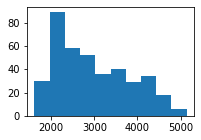

In [39]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(data['WGT']) #plotting histogram of average weight
plt.show()

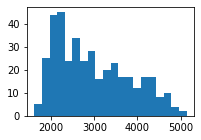

In [26]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(data['WGT'], bins=20) #pass bins param to change the number of bins for histogram
plt.show()

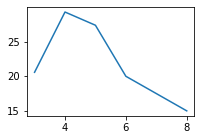

In [27]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(cyl, avg_mpg)
plt.show()

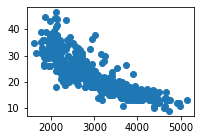

In [29]:
fig, ax = plt.subplots(figsize=(3,2))
ax.scatter(data['WGT'], data['MPG']) # using weight and mpg columns to draw scatterplot
plt.show()

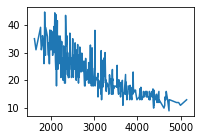

In [30]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(avg_mpg_wgt)
plt.show()

In [35]:
print(avg_mpg_wgt.head(10))
print('')
print(len(avg_mpg_wgt))

WGT
1613    35.000000
1649    31.000000
1755    39.099998
1760    35.099998
1773    31.000000
1795    33.000000
1800    36.099998
1825    32.750000
1834    27.000000
1835    26.000000
Name: MPG, dtype: float64

346


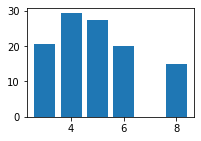

In [37]:
fig, ax = plt.subplots(figsize=(3,2))
ax.bar(cyl, avg_mpg)
plt.show()

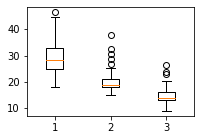

In [44]:
cyl_arr = [cyl4, cyl6, cyl8]

fig, ax = plt.subplots(figsize=(3,2))
ax.boxplot(cyl_arr)
plt.show()

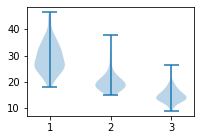

In [46]:
fig, ax = plt.subplots(figsize=(3,2))
ax.violinplot(cyl_arr)
plt.show()

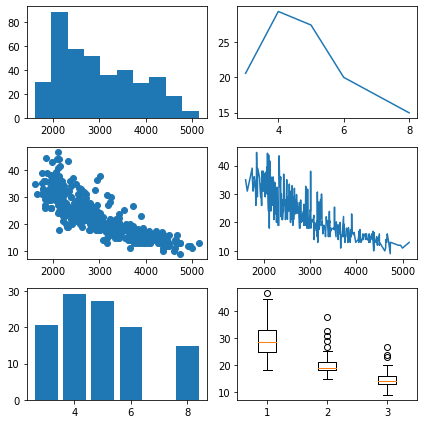

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6,6))
axes = axes.flatten()

axes[0].hist(data['WGT'])
axes[1].plot(cyl, avg_mpg)
axes[2].scatter(data['WGT'], data['MPG'])
axes[3].plot(avg_mpg_wgt)
axes[4].bar(cyl, avg_mpg)
axes[5].boxplot([cyl4,cyl6,cyl8])

plt.tight_layout()
plt.show()

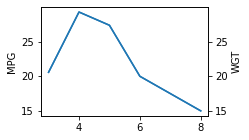

In [49]:
fig, ax = plt.subplots(figsize=(3,2))
ax_wgt = ax.twinx()

ax.plot(cyl, avg_mpg)
ax_wgt.plot(cyl, avg_mpg)

ax.set_ylabel('MPG')
ax_wgt.set_ylabel('WGT')

plt.show()

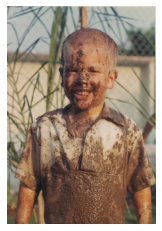

In [52]:
from PIL import Image
img_path = "../notebooks/images/"

fig, ax = plt.subplots(1, 1, figsize=(3,4))
mud = Image.open(img_path+'mud.jpg')

plt.imshow(mud)
ax.axis('off') # to not display axes
plt.show()

In [54]:
digits = pd.read_csv('https://mlbook.explained.ai/data/mnist-10k-sample.csv.zip')
true = digits['digit']

images = digits.drop('digit', axis=1)
digits.head(3)

,px0.0,px0.1,px0.2,px0.3,px0.4,px0.5,px0.6,px0.7,px0.8,px0.9,...,px27.19,px27.20,px27.21,px27.22,px27.23,px27.24,px27.25,px27.26,px27.27,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [64]:
digits.shape

(10000, 785)

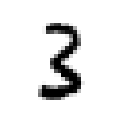

In [55]:
three_img = images.iloc[0].values
three_img_28x28 = three_img.reshape(28,28)

fig, ax = plt.subplots(1, 1, figsize=(3,2))
ax.imshow(three_img_28x28, cmap='binary') #grayscale colormap for the pixel data
ax.axis('off')
plt.show()

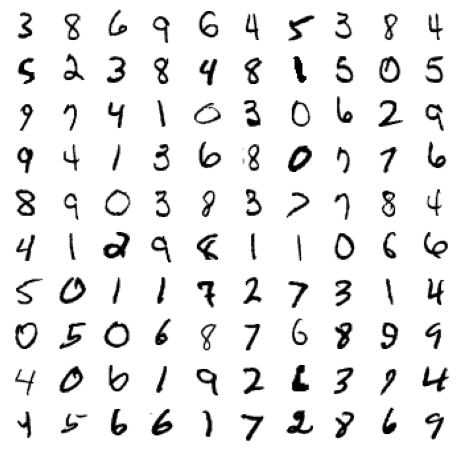

In [63]:
#fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(8, 1.6))
fig, axes = plt.subplots(10, 10, figsize=(8,8)) #can adjust figsize to display more data in output

for i, ax in enumerate(axes.flatten()):
    img = images.iloc[i].values
    img_28x28 = img.reshape(28,28)
    
    ax.axis('off')
    ax.imshow(img_28x28, cmap='binary')
plt.show()

In [66]:
c = data.corr().abs()
c

,MPG,CYL,ENG,WGT
MPG,1.000000,0.777618,0.805127,0.832244
CYL,0.777618,1.000000,0.950823,0.897527
ENG,0.805127,0.950823,1.000000,0.932994
WGT,0.832244,0.897527,0.932994,1.000000


[]

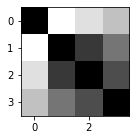

In [69]:
fig, ax = plt.subplots(figsize=(3,2))
ax.imshow(c, cmap='binary')
plt.plot()

[]

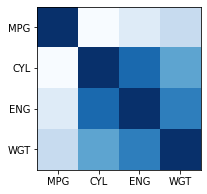

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.imshow(c, cmap='Blues') # change the colormap

ax.set_xticks(range(4))
ax.set_xticklabels(c.columns)

ax.set_yticks(range(4)) # integers for x,y axis ticks so that it indexes properly
ax.set_yticklabels(c.columns)

plt.plot()

In [74]:
c.columns

Index(['MPG', 'CYL', 'ENG', 'WGT'], dtype='object')